In [1]:
using Revise
using HierarchicalDA
using LinearAlgebra
using CairoMakie
using FFTW
using Statistics
using FastGaussQuadrature
using FastTransforms

In [2]:
# using LinearAlgebra
# using FFTW
# N = 100
# x = rand()

In [3]:
Nx = 100
αk = 1.0

1.0

In [4]:
x = gausslegendre(Nx)[1];

In [11]:
f = SmoothPeriodic(128, 0.5)

SmoothPeriodic(128, 1.0, 0.5, ComplexF64[-0.25454098622043864 - 0.42576431567939294im, 0.4013715986446244 + 0.6702154712660966im, -0.8718797698449359 + 0.8962125929619404im, 0.0383507276698847 + 0.3235632372521236im, 0.3967158575678242 + 0.22445353400140353im, 0.4867342437975834 + 0.34628496866900743im, -0.02344298305177565 - 0.1988160003817018im, -0.37019658572095476 + 0.3994289411573465im, 0.4263644013246074 + 0.11289578766854651im, -0.10965097196808982 - 0.22375451159644386im  …  -0.0015379058403864737 + 0.004600807265940961im, -0.0048215534950171775 + 0.0004006377352909608im, 0.0016326221488194613 - 0.0007029832517352141im, -0.003517816600909149 - 0.004584259430362217im, -0.0009359576018896926 - 0.001519433845337067im, 0.0033999462863143724 + 0.0012418217403768498im, -0.0006759756883720148 + 0.0025457686931725254im, -0.0020347987999567068 - 0.003228552303264898im, 0.004429840573941513 + 0.002230714748828821im, -0.0011547541830454102 + 0.009707440104323197im])

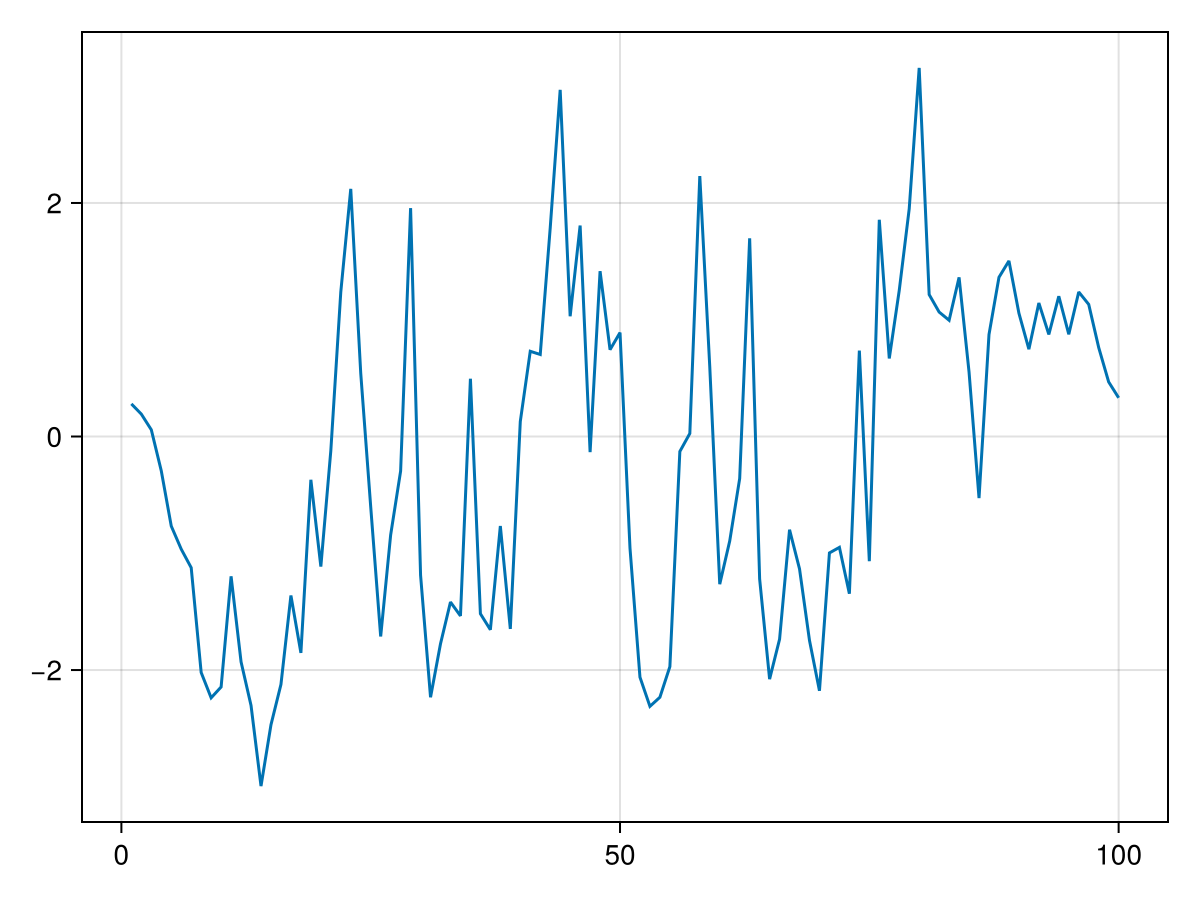

In [16]:
lines(f.(x))

In [77]:
z = randn(Nx)# + im*randn(Nx);

10-element Vector{Float64}:
 -1.9601192308829958
 -1.296136192993154
 -1.0356662721984606
  0.28068279750164526
  1.009690265647513
  1.1047609040060804
  0.5988897978808044
  0.6526771062941842
 -1.4602682744187991
 -0.07168836788870339

In [78]:
# Build FFT matrix

DFT = zeros(ComplexF64, (Nx, Nx))
IDFT = zeros(ComplexF64, (Nx, Nx))
        
for q=0:Nx-1
    for j=0:Nx-1
        DFT[q+1,j+1] = exp(-2*π*im*q*j/Nx)
        IDFT[q+1,j+1] = exp(2*π*im*q*j/Nx)
    end
end
rmul!(IDFT, inv(Nx))
        
@show max(norm(DFT*IDFT-I), norm(IDFT*DFT-I))
    

# Comparison with FFTW.jl
s = randn(Nx)
@show norm(fft(s)-DFT*s)
ŝ = randn(Nx) + im*randn(Nx)
@show norm(norm(ifft(ŝ)-IDFT*ŝ));

# FFT optimized for real numbers
irfft(rfft(s), Nx)-s;

max(norm(DFT * IDFT - I), norm(IDFT * DFT - I)) = 3.5216694459011466e-15
norm(fft(s) - DFT * s) = 8.54607599596301e-15
norm(norm(ifft(ŝ) - IDFT * ŝ)) = 9.598626450551358e-16


In [79]:
z

10-element Vector{Float64}:
 -1.9601192308829958
 -1.296136192993154
 -1.0356662721984606
  0.28068279750164526
  1.009690265647513
  1.1047609040060804
  0.5988897978808044
  0.6526771062941842
 -1.4602682744187991
 -0.07168836788870339

In [80]:
ẑ = DFT*z

10-element Vector{ComplexF64}:
  -2.177177467051885 + 0.0im
  -6.532552322066429 + 0.4282170275681018im
  0.4831886559520243 + 1.0869859810516853im
  0.6292369652897347 + 0.8047466475163761im
 -1.5329957396183713 + 1.718782942831588im
 -3.5177699608919903 - 1.8510095548282135e-15im
 -1.5329957396183678 - 1.7187829428315884im
  0.6292369652897345 - 0.8047466475163713im
 0.48318865595202276 - 1.086985981051682im
  -6.532552322066433 - 0.428217027568106im

In [81]:
ẑreal = zero(ẑ)
ẑreal[1:Nx÷2+1] .= ẑ[1:Nx÷2+1]

6-element view(::Vector{ComplexF64}, 1:6) with eltype ComplexF64:
  -2.177177467051885 + 0.0im
  -6.532552322066429 + 0.4282170275681018im
  0.4831886559520243 + 1.0869859810516853im
  0.6292369652897347 + 0.8047466475163761im
 -1.5329957396183713 + 1.718782942831588im
 -3.5177699608919903 - 1.8510095548282135e-15im

In [82]:
# ẑreal = copy(ẑ)
# fill!(view(ẑreal, Nx÷2+2:Nx), 0.0*im) 

In [83]:
ẑshift = fftshift(ẑreal)
ẑshift[2:Nx÷2] .= conj(reverse(ẑreal[2:Nx÷2])) 
ifftshift!(ẑreal, ẑshift)

10-element Vector{ComplexF64}:
  -2.177177467051885 + 0.0im
  -6.532552322066429 + 0.4282170275681018im
  0.4831886559520243 + 1.0869859810516853im
  0.6292369652897347 + 0.8047466475163761im
 -1.5329957396183713 + 1.718782942831588im
 -3.5177699608919903 - 1.8510095548282135e-15im
 -1.5329957396183713 - 1.718782942831588im
  0.6292369652897347 - 0.8047466475163761im
  0.4831886559520243 - 1.0869859810516853im
  -6.532552322066429 - 0.4282170275681018im

In [84]:
norm(IDFT*ẑreal-z)

3.391409136807937e-15

In [85]:
function NDFT(x::Vector{Float64}; isrescaled = false, a = 0.0, b = 1.0, withinverse = false)
    
    @assert minimum(x) >= 0 && maximum(x) < 1 "The weights must be rescaled"
    
    x̃ = copy(x)
    if isrescaled == true

        @assert minimum(x) >= a && maximum(x) < b
        #rescale samples
        φ(x) = 0.5*(x + 1)


        for (j, x̃j) in enumerate(x̃)
            tmp = copy(x̃j)
            x̃[j] = φ(tmp)
        end
    end
    
    @assert minimum(x̃) >= 0 && maximum(x̃) < 1 "The weights must be rescaled"
    
    N = length(x̃)
    
    DFT = zeros(ComplexF64, (N, N))
    if withinverse == true
        IDFT = zeros(ComplexF64, (N, N))
    end
        
    for q=0:N-1
        for (j, x̃j) in enumerate(x̃)
            DFT[q+1,j] =  exp(-2*π*im*q*x̃j)
            if withinverse == true
                IDFT[q+1,j] = exp(2*π*im*q*x̃j)
            end
        end
    end
    
    if withinverse == false
        return DFT
    else
        IDFT .*= inv(N)
        return DFT, IDFT
    end
end

NDFT (generic function with 1 method)

In [96]:
mod(0.1-0.2, 1)

0.9

In [86]:
function nonuniform_sampling(x::Vector{Float64}, αk::Float64)
    N = length(x)
    @assert mod(N, 2) === 0 "N should be an even integer"
    ẑ = zeros(ComplexF64, N)
    
    ẑ[1] = randn()*exp(-0.5*1^αk)
    for k=2:N÷2+1
        ẑ[k] = (randn()+ im*randn())*exp(-0.5*k^αk)
    end
#     ẑ[N÷2+1] = randn()*exp(-0.5*(Nx÷2+1)^αk)

    # Symmetrize things
    ẑshift = fftshift(ẑ)
    ẑshift[2:N÷2] .= conj(reverse(ẑ[2:N÷2])) 
    ifftshift!(ẑ, ẑshift)
    
    plan_NDFT = NDFT(x; isrescaled = false, a = 0, b = 1, withinverse = false) 

    plan_NIDFT = inv(plan_NDFT)

    return real(plan_NIDFT*ẑ)
end

nonuniform_sampling (generic function with 2 methods)

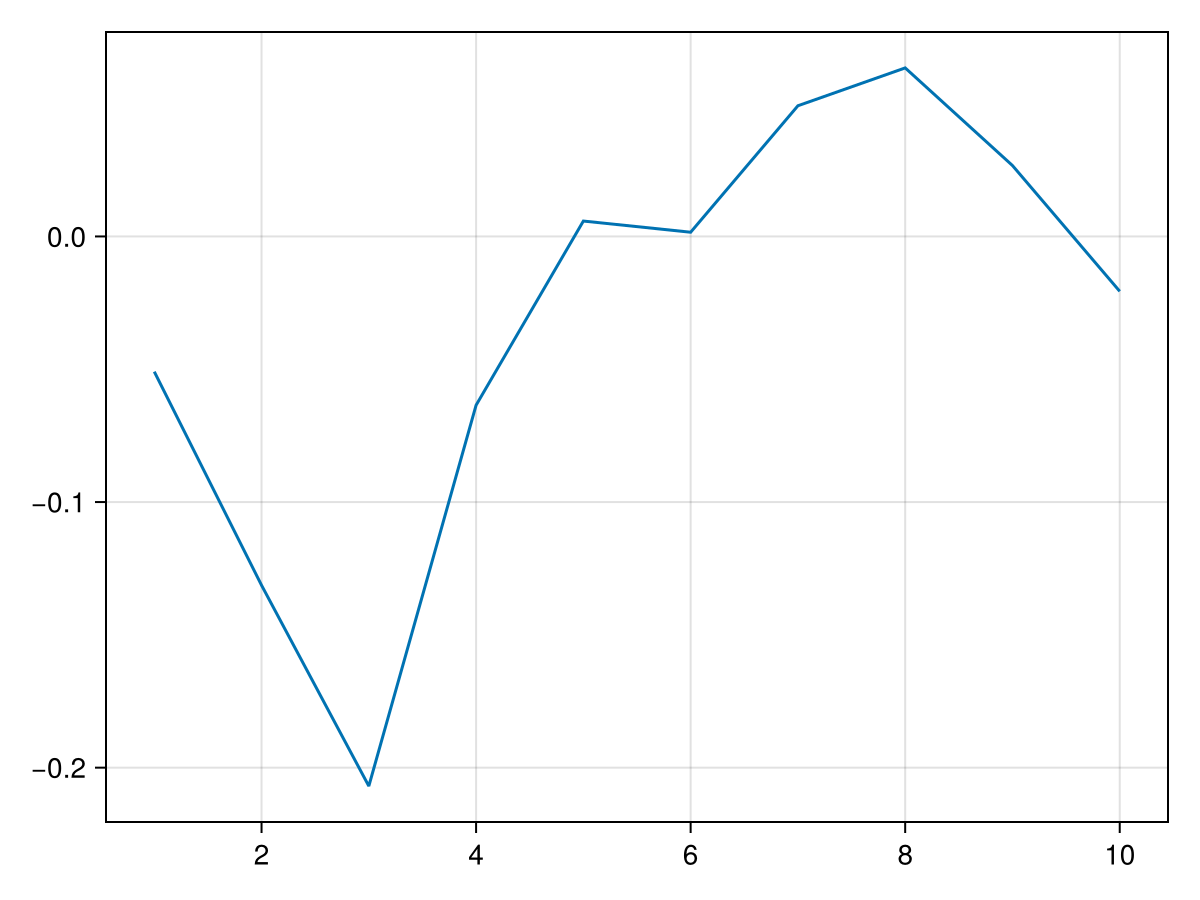

In [87]:
lines(nonuniform_sampling(collect(0:Nx-1)./Nx, 1.0))

In [88]:
nDFT, nIDFT = NDFT(map(i -> i/Nx, 0:Nx-1); isrescaled = false, a = 0.0, b = 1.0, withinverse = true)

(ComplexF64[1.0 - 0.0im 1.0 - 0.0im … 1.0 - 0.0im 1.0 - 0.0im; 1.0 - 0.0im 0.8090169943749475 - 0.5877852522924731im … 0.30901699437494723 + 0.9510565162951536im 0.8090169943749473 + 0.5877852522924734im; … ; 1.0 - 0.0im 0.30901699437494723 + 0.9510565162951536im … -0.8090169943749466 - 0.5877852522924744im 0.3090169943749491 - 0.951056516295153im; 1.0 - 0.0im 0.8090169943749473 + 0.5877852522924734im … 0.3090169943749491 - 0.951056516295153im 0.8090169943749466 - 0.5877852522924744im], ComplexF64[0.1 + 0.0im 0.1 + 0.0im … 0.1 + 0.0im 0.1 + 0.0im; 0.1 + 0.0im 0.08090169943749476 + 0.058778525229247314im … 0.030901699437494726 - 0.09510565162951537im 0.08090169943749474 - 0.05877852522924734im; … ; 0.1 + 0.0im 0.030901699437494726 - 0.09510565162951537im … -0.08090169943749466 + 0.05877852522924744im 0.030901699437494913 + 0.0951056516295153im; 0.1 + 0.0im 0.08090169943749474 - 0.05877852522924734im … 0.030901699437494913 + 0.0951056516295153im 0.08090169943749466 + 0.05877852522924744i

In [93]:
plan_uniform = NDFT(collect(0:Nx-1) ./ Nx)

10×10 Matrix{ComplexF64}:
 1.0-0.0im        1.0-0.0im          …        1.0-0.0im
 1.0-0.0im   0.809017-0.587785im         0.809017+0.587785im
 1.0-0.0im   0.309017-0.951057im         0.309017+0.951057im
 1.0-0.0im  -0.309017-0.951057im        -0.309017+0.951057im
 1.0-0.0im  -0.809017-0.587785im        -0.809017+0.587785im
 1.0-0.0im       -1.0-1.22465e-16im  …       -1.0-1.10218e-15im
 1.0-0.0im  -0.809017+0.587785im        -0.809017-0.587785im
 1.0-0.0im  -0.309017+0.951057im        -0.309017-0.951057im
 1.0-0.0im   0.309017+0.951057im         0.309017-0.951057im
 1.0-0.0im   0.809017+0.587785im         0.809017-0.587785im

In [89]:
plan = NDFT(0.5*(x .+ 1))

10×10 Matrix{ComplexF64}:
      1.0-0.0im              1.0-0.0im       …       1.0-0.0im
 0.996642-0.0818833im   0.911485-0.411333im     0.996642+0.0818833im
  0.98659-0.163217im     0.66161-0.749848im      0.98659+0.163217im
 0.969913-0.243454im    0.294611-0.955617im     0.969913+0.243454im
 0.946721-0.322056im   -0.124543-0.992214im     0.946721+0.322056im
 0.917171-0.398495im    -0.52165-0.85316im   …  0.917171+0.398495im
 0.881461-0.472258im   -0.826409-0.563071im     0.881461+0.472258im
 0.839831-0.542849im   -0.984869-0.173302im     0.839831+0.542849im
  0.79256-0.609794im   -0.968978+0.247147im      0.79256+0.609794im
 0.739967-0.672644im   -0.781549+0.623843im     0.739967+0.672644im

In [94]:
plan*z

10-element Vector{ComplexF64}:
  -2.177177467051885 + 0.0im
  -6.812100532877614 + 1.8684366845384248im
 -3.2126324559682975 + 1.5043009671598147im
  -2.238839269607489 + 0.341372319234567im
 -1.3741649648080705 - 0.7180302174150913im
 0.15981051725997591 - 0.7605277141487081im
   -2.15446389395809 + 0.06395182618788414im
  3.7031573468086854 + 2.1220838605812458im
 -0.6977695918839453 + 3.215877881790251im
  1.1916024289243763 + 1.7867703916792126im

In [68]:
norm(nDFT*nIDFT-I), norm(nIDFT*nDFT-I)

(2.4116084725422504e-13, 2.4115065899528377e-13)

In [69]:
norm(nDFT - DFT), norm(nIDFT -IDFT)

(1.8515316842895126e-12, 1.851510382644674e-14)

In [70]:
nDFT2 = NDFT(0.5*(w .+ 1); isrescaled = false, a = 0.0, b = 1.0, withinverse = false)

100×100 Matrix{ComplexF64}:
      1.0-0.0im               1.0-0.0im         …       1.0-0.0im
      1.0-0.000899354im  0.999989-0.00473766im          1.0+0.000899354im
 0.999998-0.00179871im   0.999955-0.00947521im     0.999998+0.00179871im
 0.999996-0.00269806im   0.999899-0.0142126im      0.999996+0.00269806im
 0.999994-0.00359741im    0.99982-0.0189496im      0.999994+0.00359741im
  0.99999-0.00449675im   0.999719-0.0236862im   …   0.99999+0.00449675im
 0.999985-0.0053961im    0.999596-0.0284222im      0.999985+0.0053961im
  0.99998-0.00629544im    0.99945-0.0331577im       0.99998+0.00629544im
 0.999974-0.00719477im   0.999282-0.0378923im      0.999974+0.00719477im
 0.999967-0.0080941im    0.999091-0.0426262im      0.999967+0.0080941im
  0.99996-0.00899342im   0.998878-0.047359im    …   0.99996+0.00899342im
 0.999951-0.00989273im   0.998642-0.0520909im      0.999951+0.00989273im
 0.999942-0.010792im     0.998384-0.0568215im      0.999942+0.010792im
         ⋮                       

In [44]:
function initial_condition(αk, Δx, Nx::Int64)
    return irfft((randn(Nx÷2+1) + im*randn(Nx÷2+1)).* map(k-> exp(-0.5*k^αk), 1:Nx÷2+1), Nx)/Δx
#     return irfft((randn(Nx÷2+1)).* map(k-> exp(-0.5*k^αk), 1:Nx÷2+1), Nx)/Δx
end

initial_condition (generic function with 1 method)

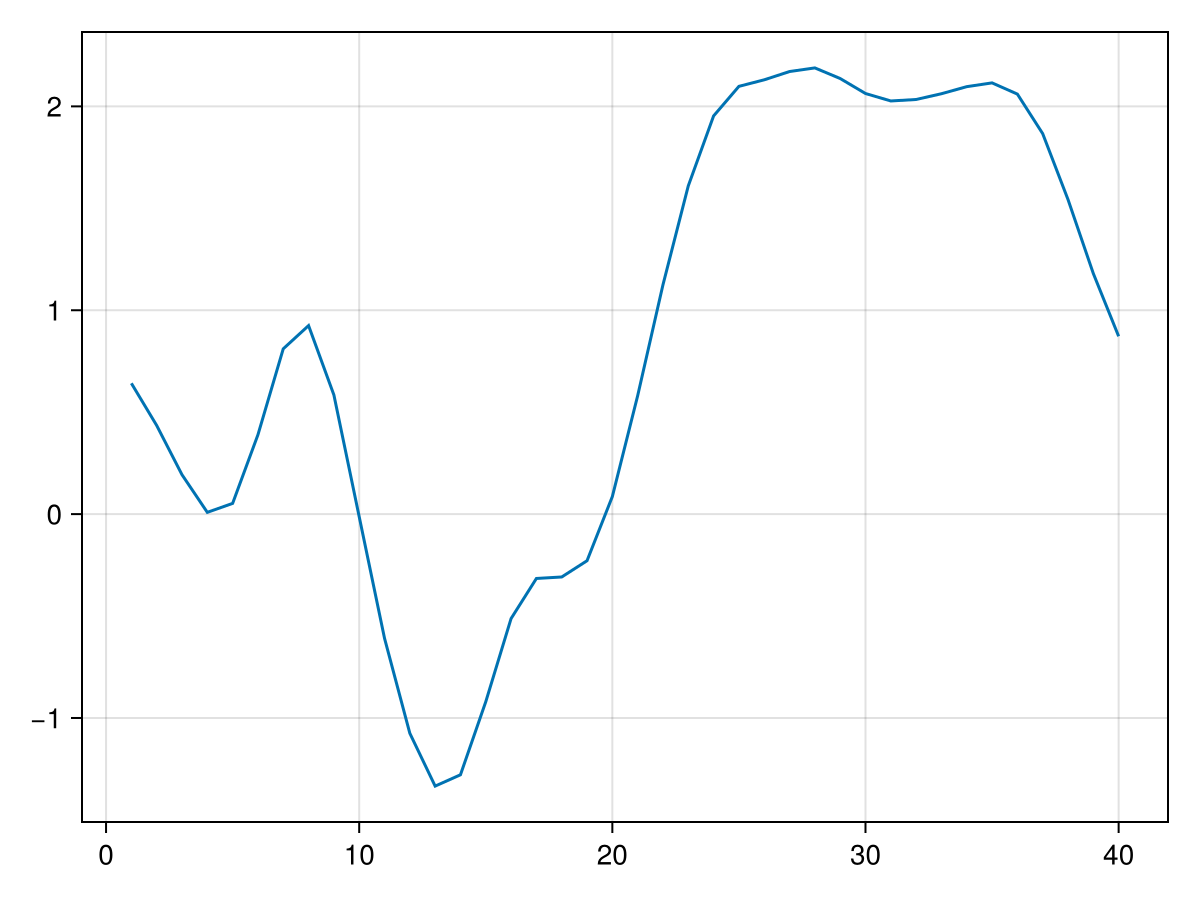

In [46]:
lines(initial_condition(αk, 1/Nx, Nx))